In [52]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

fn_exp1 = "./exp_compare_estimators.pkl"
fn_exp2 = ["./results_coupling_time_target_wrt_to_dim.pkl", "results_coupling_time_offset_wrt_to_dim.pkl"]
fn_exp3 = ["./results_coupling_time_target_wrt_to_eta.pkl", "results_coupling_time_offset_wrt_to_eta.pkl"]


with open(fn_exp1, 'rb') as handle:
    exp1 = pickle.load(handle)
with open(fn_exp2[0], 'rb') as handle:
    exp2 = pickle.load(handle)
with open(fn_exp2[1], 'rb') as handle:
    exp2_offset = pickle.load(handle)
with open(fn_exp3[0], 'rb') as handle:
    exp3 = pickle.load(handle)
with open(fn_exp3[1], 'rb') as handle:
    exp3_offset = pickle.load(handle)
    


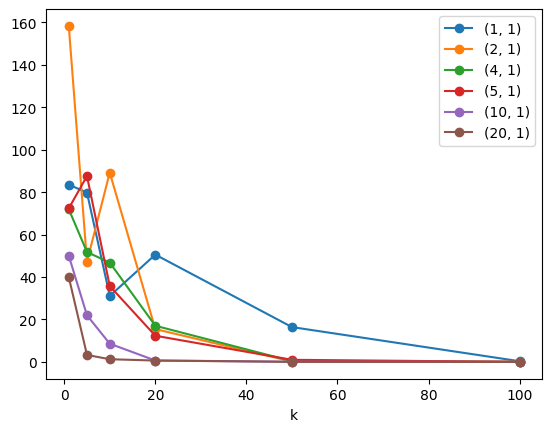

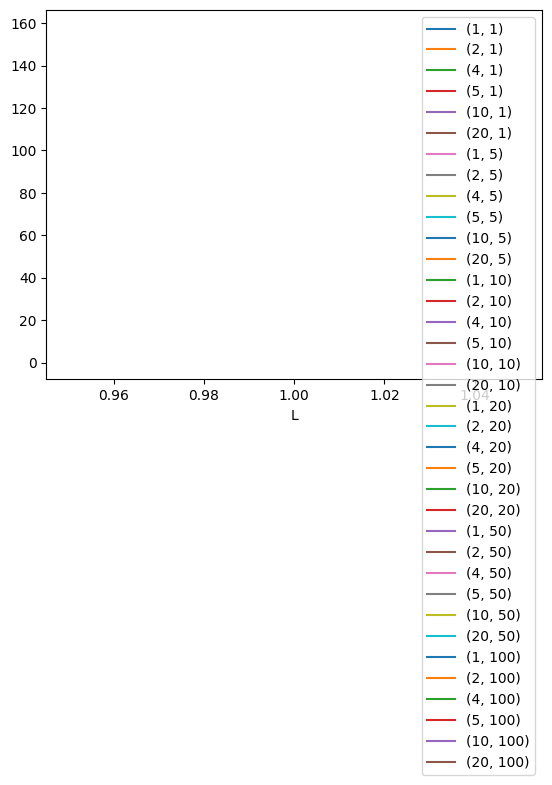

In [67]:
"""
Setup for experiment 1
Analyzing the variance of the unbiased estimators depending on (k, m, lag)
"""

"""
n_samples = 1_000
ks = [1, 100, 200]
m_mults = [1, 10, 100]
lags = [1, 10, 100]"""

ks = [1, 5, 10, 20, 50, 100]
m_mults = [1, 2, 4, 5, 10, 20]
lags = [1]

"""
Plot w.r.t to k for different lag and m_mult, 
the variance of the unbiased estimator
"""
for m_mult in m_mults:
    for lag in lags:
        plt.plot(ks, [np.var(exp1[k][m_mult*k][lag][1]) if lag <= k else 0. for k in ks], label=(m_mult, lag),marker='o')
plt.xlabel("k")
plt.legend()
plt.show()    

"""
Plot w.r.t to lag, for different k and m_mult,
the variance of the unbiased estimator
"""
for k in ks:
    for m_mult in m_mults:
        plt.plot(lags, [np.var(exp1[k][m_mult*k][lag][1]) if lag <= k else 0. for lag in lags], label=(m_mult, k))
plt.xlabel("L")
plt.legend()
plt.show()

Mean (target): 4.334000110626221
Mean (offset): 4.535000324249268
95% quantile (target): 11.0
95% quantile (offset): 14.0


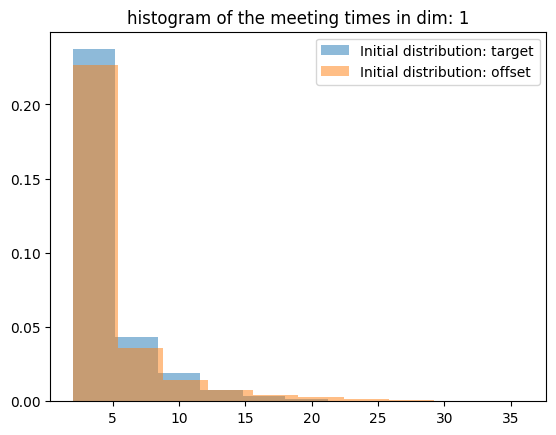

Mean (target): 10.37600040435791
Mean (offset): 14.92300033569336
95% quantile (target): 31.0
95% quantile (offset): 42.0


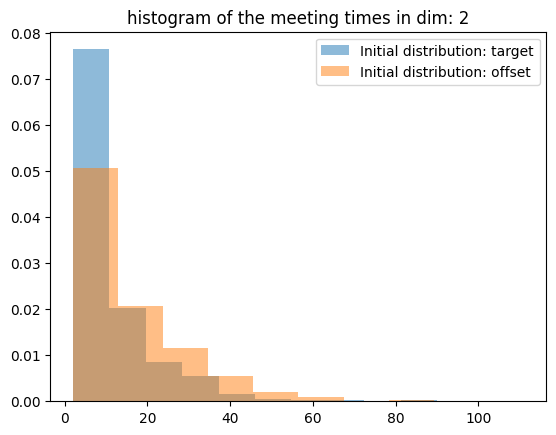

Mean (target): 25.595001220703125
Mean (offset): 38.98800277709961
95% quantile (target): 77.04999999999995
95% quantile (offset): 92.04999999999995


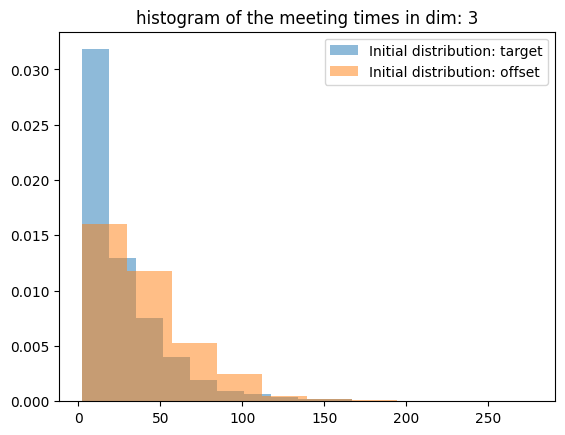

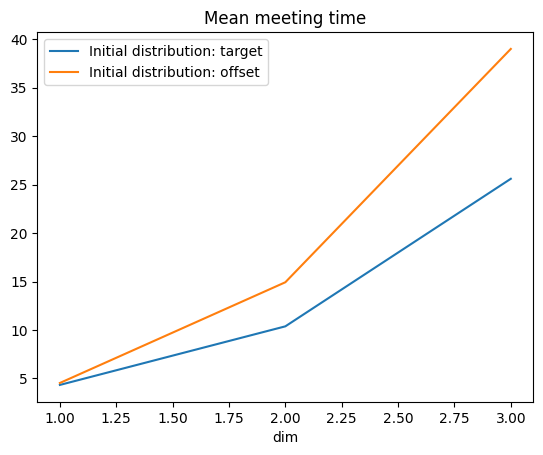

In [69]:
"""
Setup for experiment 2
Analyzing the histogram of the meeting times depending on the dimension
"""
k = 10
m = 10 * k
lag = 1
dims = [1, 2, 3]
for dim in dims:
    print(f"Mean (target): {exp2[dim][-1].mean()}")
    print(f"Mean (offset): {exp2_offset[dim][-1].mean()}")
    print(f"95% quantile (target): {np.quantile(exp2[dim][-1], 0.95)}")
    print(f"95% quantile (offset): {np.quantile(exp2_offset[dim][-1], 0.95)}")
    plt.hist(exp2[dim][-1], label="Initial distribution: target", alpha=0.5, bins=10, density=True)
    plt.hist(exp2_offset[dim][-1], label="Initial distribution: offset", alpha=0.5, bins=10, density=True)
    plt.title(f"histogram of the meeting times in dim: {dim}")
    plt.legend()
    plt.show()
plt.plot(dims, [exp2[dim][-1].mean() for dim in dims], label="Initial distribution: target")
plt.plot(dims, [exp2_offset[dim][-1].mean() for dim in dims], label="Initial distribution: offset")
plt.title("Mean meeting time")
plt.xlabel("dim")
plt.legend()
plt.show()

Mean (target): 18.31800079345703
Mean (offset): 18.701000213623047
95% quantile (target): 53.0
95% quantile (offset): 53.0


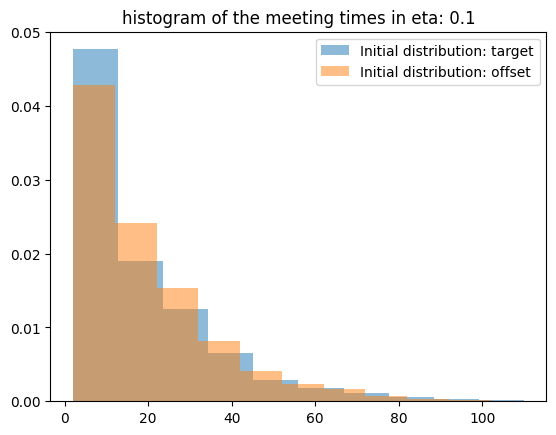

Mean (target): 10.075000762939453
Mean (offset): 10.582000732421875
95% quantile (target): 28.0
95% quantile (offset): 28.0


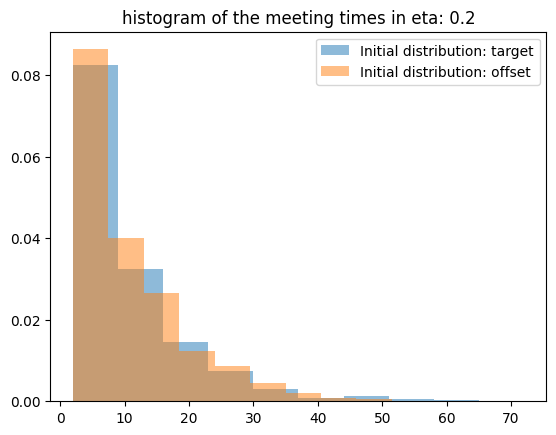

Mean (target): 7.25100040435791
Mean (offset): 7.694000244140625
95% quantile (target): 20.0
95% quantile (offset): 21.0


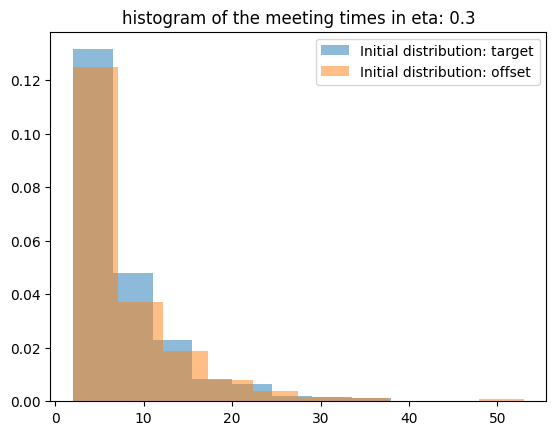

Mean (target): 6.009000301361084
Mean (offset): 6.76900053024292
95% quantile (target): 16.049999999999955
95% quantile (offset): 18.0


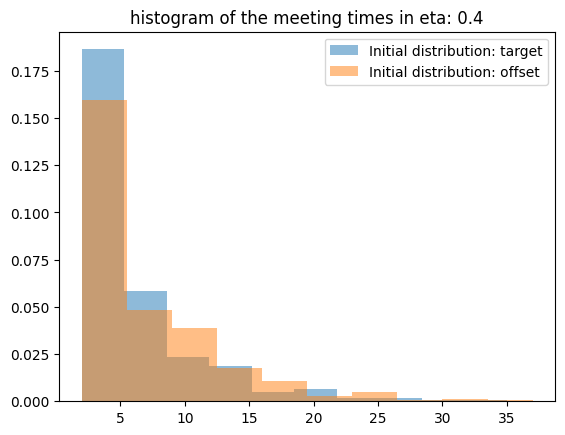

Mean (target): 5.319000244140625
Mean (offset): 5.931000232696533
95% quantile (target): 13.0
95% quantile (offset): 16.0


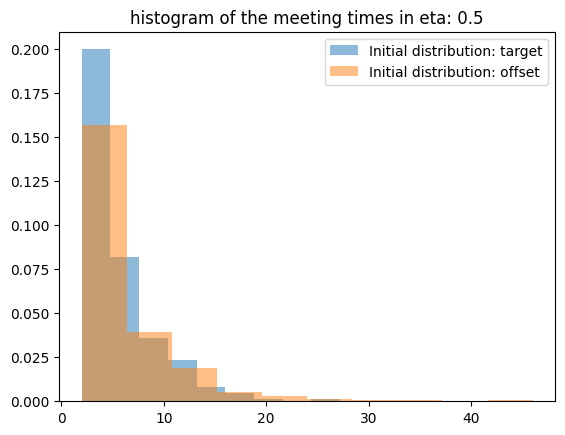

Mean (target): 4.884000301361084
Mean (offset): 5.14900016784668
95% quantile (target): 12.0
95% quantile (offset): 16.0


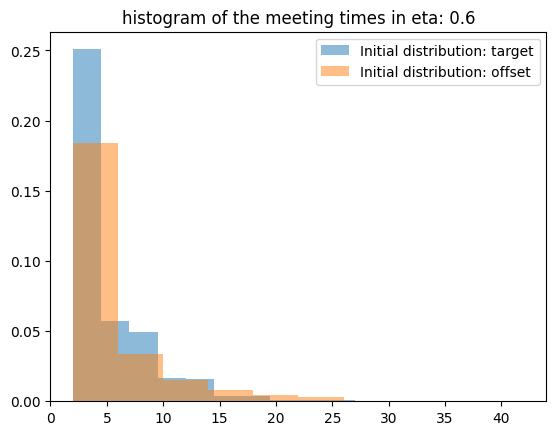

Mean (target): 4.572000026702881
Mean (offset): 4.7870001792907715
95% quantile (target): 12.0
95% quantile (offset): 13.0


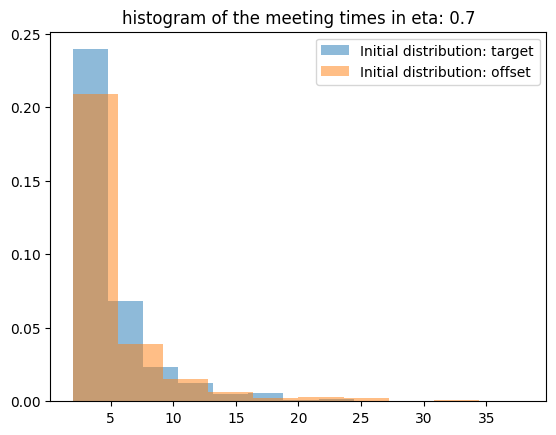

Mean (target): 4.2860002517700195
Mean (offset): 4.4730000495910645
95% quantile (target): 12.0
95% quantile (offset): 13.049999999999955


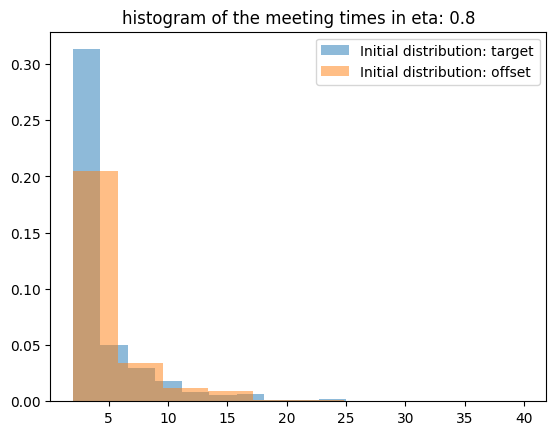

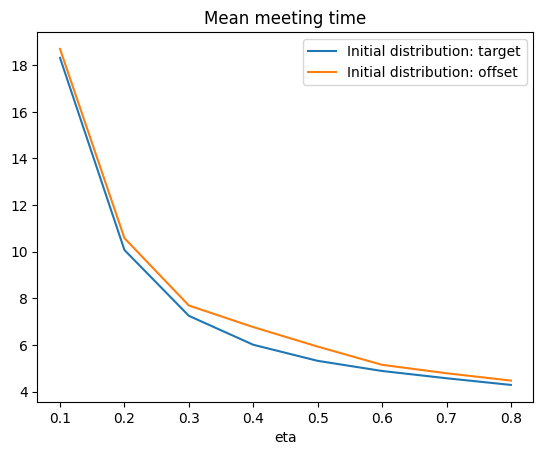

In [68]:
"""
Setup for experiment 3.
Evolution of the meeting time distribution with respect to eta.
"""
etas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
k = 10
m = 10 * k
lag = 1
dim = 1


for eta in etas:
    print(f"Mean (target): {exp3[eta][-1].mean()}")
    print(f"Mean (offset): {exp3_offset[eta][-1].mean()}")
    print(f"95% quantile (target): {np.quantile(exp3[eta][-1], 0.95)}")
    print(f"95% quantile (offset): {np.quantile(exp3_offset[eta][-1], 0.95)}")
    plt.hist(exp3[eta][-1], label="Initial distribution: target", alpha=0.5, bins=10, density=True)
    plt.hist(exp3_offset[eta][-1], label="Initial distribution: offset", alpha=0.5, bins=10, density=True)
    plt.title(f"histogram of the meeting times in eta: {eta}")
    plt.legend()
    plt.show()

plt.plot(etas, [exp3[eta][-1].mean() for eta in etas], label="Initial distribution: target")
plt.plot(etas, [exp3_offset[eta][-1].mean() for eta in etas], label="Initial distribution: offset")
plt.title("Mean meeting time")
plt.xlabel("eta")
plt.legend()
plt.show()